## Example: finite element analysis

#### For equilateral triangle tiling

Effective elastic modulus: 7000105984.0
Poisson ratio: 0.3388569951057434
# Cells: 170
Density: 0.1


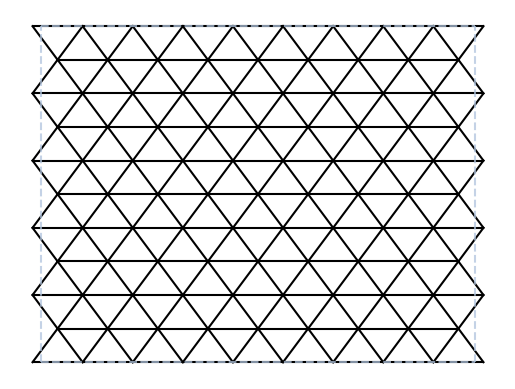

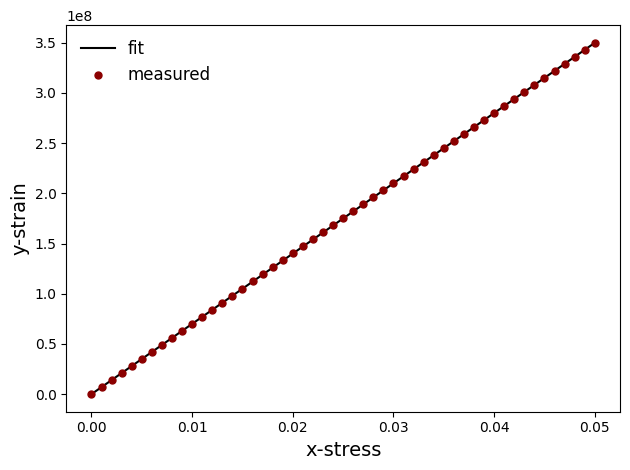

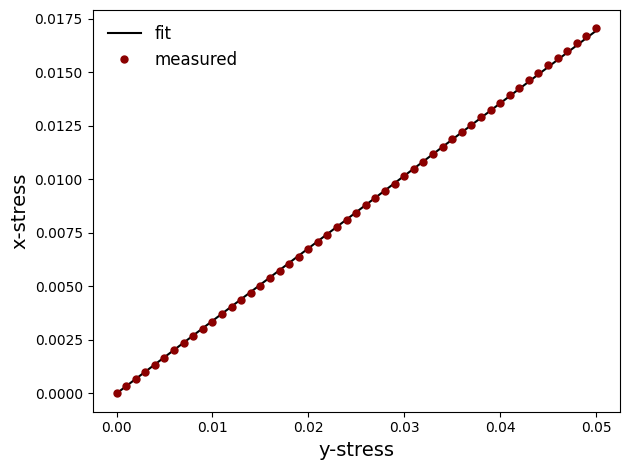

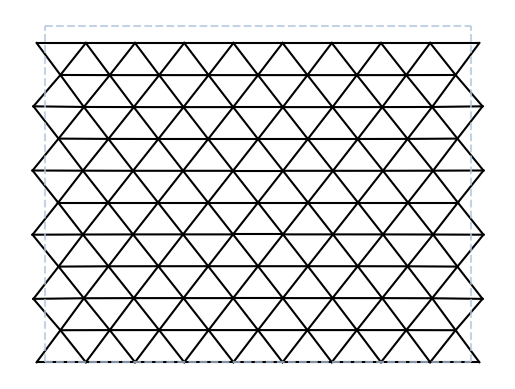

In [1]:
# Load packages
from pyLattice2D.models.Lattice import DifferentiableLattice
from pyLattice2D.models.FEM import FEModel
from pyLattice2D.methods.mechanical_properties import get_Yprop
import numpy as np

# Set up the lattice
# This means:
# choose the lattice type, number of layers in the material, and the type of perturbations that should
# be applied to the base tiling
lattice_setup = {'type': 'triangle', # lattice type
                 'num': 11, # number of layers in the lattice (if Voronoi: number of cells)
                 'seed': 1224, # random seed
                 'remove_nodes': 0, # how many nodes to remove from base tiling
                 'remove_edges': 0., # fraction of edges to remove from base tiling
                 'move_nodes': [0., 0.8], # std of random movement and fraction of nodes to randomly move
                 'add_edges': [0, 0.2], # how many edges to add, and the minimum length of an edge to be added
                 'BeamCrossArea_A': 0.00002, # beam cross-area
                 'YoungsModulus_E': 200*1e9, # Young's modulus of beams
                 'oversaturate_edges': None, # whether to add edges that have not been present in the base tiling
                 'edge_mask_init': None, # whether to mask edges
                 'train_coordinates': True, # whether to have trainable node coordinates
                }

# Create the differentiable lattice object used in simulations
lat = DifferentiableLattice(lattice_setup)

# Set up the compression experiment
experiment_setup = {'forced_nodes': lat.original.top_nodes, # nodes that are forcefully moved
                    'static_nodes': lat.original.bottom_nodes, # nodes that are kept fixed in y-direction
                    'displacement': 0.05/50., # displacement in y-direction applied to forced nodes in each step
                    'num_steps': 50, # number of compression steps
                    'fit': False,
                   'draw_response': False}

# Set up the finite element model
model = FEModel()
lat.draw_lattice()

dens = lat.original.density_factor
lat.BeamCrossArea_A = (0.1/dens)**2

# Get mechanical properties
E, sigma_triangle, delta = get_Yprop(lat, model, experiment_setup)
lat.draw_lattice(delta)
print('Effective elastic modulus: {}'.format(E))
print('Poisson ratio: {}'.format(sigma_triangle))
print('# Cells: {}'.format(lat.original.num_cells))
print('Density: {}'.format(lat.original.density_factor*np.sqrt(lat.BeamCrossArea_A)))




#### For honeycomb tiling

Effective elastic modulus: 2887414.0
Poisson ratio: 0.8917081356048584
# Cells: 150
Density: 0.1


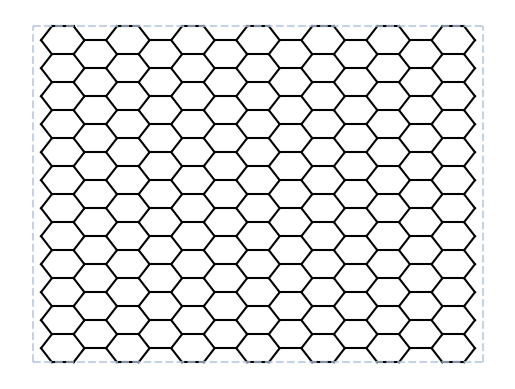

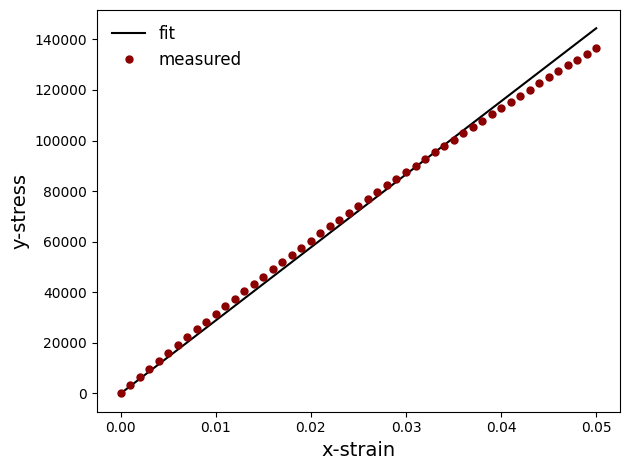

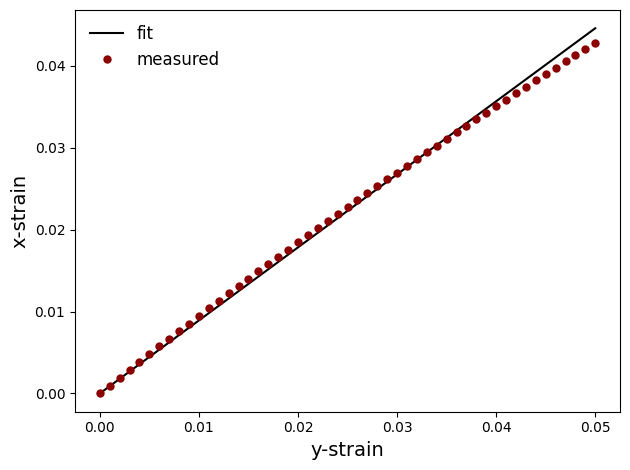

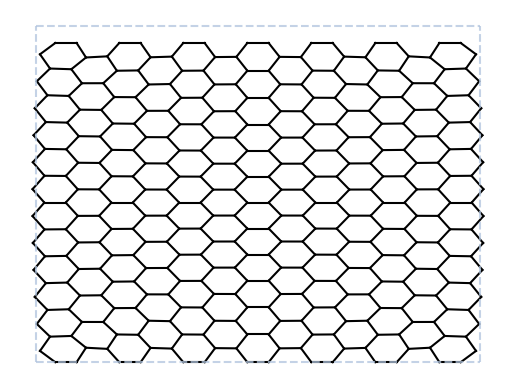

In [2]:
lattice_setup['type'] = 'honeycomb'
lattice_setup['num'] = 25

lat = DifferentiableLattice(lattice_setup)
      
experiment_setup['forced_nodes'] = lat.original.top_nodes
experiment_setup['static_nodes'] = lat.original.bottom_nodes
    
model = FEModel()
lat.draw_lattice()

dens = lat.original.density_factor
lat.BeamCrossArea_A = (0.1/dens)**2

E, sigma_honey, delta = get_Yprop(lat, model, experiment_setup)
lat.draw_lattice(delta)

print('Effective elastic modulus: {}'.format(E))
print('Poisson ratio: {}'.format(sigma_honey))
print('# Cells: {}'.format(lat.original.num_cells))
print('Density: {}'.format(lat.original.density_factor*np.sqrt(lat.BeamCrossArea_A)))